In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# URL of the data
url = "https://data.boston.gov/dataset/e02c44d2-3c64-459c-8fe2-e1ce5f38a035/resource/1000d81c-5bb5-49e8-a9ab-44cd042f1db2/download/fy2023-property-assessment-data.csv"

# Use pd.read_csv() for CSV data
df = pd.read_csv(url)

df.head(5)

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIP_CODE,BLDG_SEQ,NUM_BLDGS,...,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,HEAT_FUEL,AC_TYPE,FIREPLACES,ORIENTATION,NUM_PARKING,PROP_VIEW,CORNER_UNIT
0,100001000,NaN,100001000,104.0,PUTNAM ST,NaN,EAST BOSTON,2128.0,1.0,1,...,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.0,NaN,3.0,A - Average,NaN
1,100002000,NaN,100002000,197.0,Lexington ST,NaN,EAST BOSTON,2128.0,1.0,1,...,M - Modern,M - Modern,F - Forced Hot Air,NaN,C - Central AC,0.0,NaN,0.0,A - Average,NaN
2,100003000,NaN,100003000,199.0,Lexington ST,NaN,EAST BOSTON,2128.0,1.0,1,...,S - Semi-Modern,S - Semi-Modern,S - Space Heat,NaN,N - None,0.0,NaN,0.0,A - Average,NaN
3,100004000,NaN,100004000,201.0,Lexington ST,NaN,EAST BOSTON,2128.0,1.0,1,...,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.0,NaN,0.0,A - Average,NaN
4,100005000,NaN,100005000,203.0,Lexington ST,NaN,EAST BOSTON,2128.0,1.0,1,...,S - Semi-Modern,NaN,W - Ht Water/Steam,NaN,N - None,0.0,NaN,0.0,A - Average,NaN


In [2]:
lstdrop = ['ST_NUM','TT_RMS','FIREPLACES','RES_FLOOR','KITCHENS','HLF_BTH','FULL_BTH','BED_RMS','ZIP_CODE','GROSS_AREA','YR_BUILT','LAND_SF','BLDG_VALUE','TOTAL_VALUE']
for x in lstdrop:
    df.dropna(subset=[x], inplace=True)

df['GROSS_TAX'] = df['GROSS_TAX'].fillna(0)
df['LIVING_AREA'] = df['LIVING_AREA'].fillna(0)
df['NUM_PARKING'] = df['NUM_PARKING'].fillna(0)
df['PROP_VIEW'] = df['PROP_VIEW'].fillna('U - Unknown')

df['BLDG_TYPE'] = df['BLDG_TYPE'].fillna('NoBld')
df['AGE'] = 2023 - df['YR_BUILT']

df['AC_TYPE'] = df['AC_TYPE'].fillna('N - None')
df['HEAT_TYPE'] = df['HEAT_TYPE'].fillna('N - None')
df['KITCHEN_TYPE'] = df['KITCHEN_TYPE'].fillna('N - None')
df['BTHRM_STYLE1'] = df['BTHRM_STYLE1'].fillna('N - No Remodeling')
df['BDRM_COND'] = df['BDRM_COND'].fillna('U - Unknown')
df['OVERALL_COND'] = df['OVERALL_COND'].fillna('U - Unknown')
df['EXT_COND'] = df['EXT_COND'].fillna('U - Unknown')
df['INT_COND'] = df['INT_COND'].fillna('U - Unknown')
df['EXT_FNISHED'] = df['EXT_FNISHED'].fillna('U - Unknown')
df['INT_WALL'] = df['INT_WALL'].fillna('U - Unknown')
df['ROOF_STRUCTURE'] = df['ROOF_STRUCTURE'].fillna('U - Unknown')
df['STRUCTURE_CLASS'] = df['STRUCTURE_CLASS'].fillna('U - Unknown')
df['YR_REMODEL'] = df['YR_REMODEL'].fillna(df['YR_BUILT'])
# List of columns to delete
columns_to_delete = ['CM_ID','GIS_ID','UNIT_NUM','RES_FLOOR', 'CD_FLOOR', 'RES_UNITS', 'COM_UNITS','RC_UNITS','YR_BUILT',
       'BTHRM_STYLE3','BTHRM_STYLE2','KITCHEN_STYLE1', 'KITCHEN_STYLE2','HEAT_FUEL','ROOF_COVER',
       'PROP_VIEW','PID','OWN_OCC','OWNER','OWNER MAIL ADDRESS','LUC','LU_DESC','BLDG_SEQ','CORNER_UNIT','ORIENTATION','KITCHEN_STYLE3']

# Delete columns in the list
df.drop(columns=columns_to_delete, inplace=True)
# Identify integer columns
int_columns = df.select_dtypes(include=['int']).columns
# Apply fillna() to integer columns
df[int_columns] = df[int_columns].fillna(0)
df

,ST_NUM,ST_NAME,CITY,ZIP_CODE,NUM_BLDGS,LU,BLDG_TYPE,LAND_SF,GROSS_AREA,LIVING_AREA,...,KITCHENS,TT_RMS,BDRM_COND,BTHRM_STYLE1,KITCHEN_TYPE,HEAT_TYPE,AC_TYPE,FIREPLACES,NUM_PARKING,AGE
0,104.0,PUTNAM ST,EAST BOSTON,2128.0,1,R3,RE - Row End,1150.0,3353.0,2202.0,...,3.0,12.0,U - Unknown,S - Semi-Modern,3F - 3 Full Eat In Kitchens,W - Ht Water/Steam,N - None,0.0,3.0,123.0
1,197.0,Lexington ST,EAST BOSTON,2128.0,1,R3,RM - Row Middle,1150.0,3299.0,2307.0,...,3.0,9.0,U - Unknown,M - Modern,3F - 3 Full Eat In Kitchens,F - Forced Hot Air,C - Central AC,0.0,0.0,103.0
2,199.0,Lexington ST,EAST BOSTON,2128.0,1,R3,RM - Row Middle,1150.0,3392.0,2268.0,...,3.0,13.0,U - Unknown,M - Modern,3F - 3 Full Eat In Kitchens,S - Space Heat,N - None,0.0,0.0,118.0
3,201.0,Lexington ST,EAST BOSTON,2128.0,1,R3,RM - Row Middle,1150.0,3108.0,2028.0,...,3.0,11.0,U - Unknown,S - Semi-Modern,3F - 3 Full Eat In Kitchens,W - Ht Water/Steam,N - None,0.0,0.0,123.0
4,203.0,Lexington ST,EAST BOSTON,2128.0,1,R2,RE - Row End,2010.0,3700.0,2546.0,...,2.0,13.0,U - Unknown,S - Semi-Modern,2F - 2 Full Eat In Kitchens,W - Ht Water/Steam,N - None,0.0,0.0,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180617,20.0,Lake ST,BRIGHTON,2135.0,1,R1,SD - Semi-Det,3778.0,4240.0,2390.4,...,1.0,10.0,U - Unknown,S - Semi-Modern,1F - 1 Full Eat In Kitchens,W - Ht Water/Steam,N - None,2.0,3.0,103.0
180618,18.0,Lake ST,BRIGHTON,2135.0,1,R2,CV - Conventional,5333.0,4609.0,2951.6,...,2.0,11.0,U - Unknown,M - Modern,2F - 2 Full Eat In Kitchens,F - Forced Hot Air,N - None,0.0,3.0,103.0
180620,14.0,Lake ST,BRIGHTON,2135.0,1,CD,FS - Free Standing,2777.0,2777.0,1410.0,...,1.0,8.0,A - Average,M - Modern,F - Full Eat In,W - Ht Water/Steam,N - None,1.0,1.0,103.0
180621,12.0,Lake ST,BRIGHTON,2135.0,1,CD,FS - Free Standing,1401.0,1401.0,1401.0,...,1.0,7.0,A - Average,S - Semi-Modern,F - Full Eat In,W - Ht Water/Steam,N - None,1.0,1.0,103.0


In [3]:
# Delete Outlier
# Calculate the mean and standard deviation
mean = np.mean(df['TOTAL_VALUE'])
std_dev = np.std(df['TOTAL_VALUE'])

# Define a threshold for identifying outliers (three standard deviations away)
threshold = 3 * std_dev

# Identify outliers
outliers = [x for x in df['TOTAL_VALUE'] if abs(x - mean) > threshold]

df = df[~df['TOTAL_VALUE'].isin(outliers)]

In [4]:
# Get the list of column names with categorical data types
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print the list of categorical column names
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
['ST_NAME', 'CITY', 'LU', 'BLDG_TYPE', 'STRUCTURE_CLASS', 'ROOF_STRUCTURE', 'INT_WALL', 'EXT_FNISHED', 'INT_COND', 'EXT_COND', 'OVERALL_COND', 'BDRM_COND', 'BTHRM_STYLE1', 'KITCHEN_TYPE', 'HEAT_TYPE', 'AC_TYPE']


In [5]:
miss = pd.DataFrame(df)
# Check for missing values and count them in each column
missing_values = miss.isnull().sum()
# Print missing values
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
ST_NUM             0
ST_NAME            0
CITY               0
ZIP_CODE           0
NUM_BLDGS          0
LU                 0
BLDG_TYPE          0
LAND_SF            0
GROSS_AREA         0
LIVING_AREA        0
LAND_VALUE         0
BLDG_VALUE         0
TOTAL_VALUE        0
GROSS_TAX          0
YR_REMODEL         0
STRUCTURE_CLASS    0
ROOF_STRUCTURE     0
INT_WALL           0
EXT_FNISHED        0
INT_COND           0
EXT_COND           0
OVERALL_COND       0
BED_RMS            0
FULL_BTH           0
HLF_BTH            0
KITCHENS           0
TT_RMS             0
BDRM_COND          0
BTHRM_STYLE1       0
KITCHEN_TYPE       0
HEAT_TYPE          0
AC_TYPE            0
FIREPLACES         0
NUM_PARKING        0
AGE                0
dtype: int64


In [6]:
percentage = 0.1
df = df.sample(frac=percentage, random_state=42)
# Performing 1 hot encoding
for X in categorical_columns:
    df = pd.get_dummies(df, columns=[X])

df.shape
df

,ST_NUM,ZIP_CODE,NUM_BLDGS,LAND_SF,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,GROSS_TAX,...,HEAT_TYPE_E - Electric,HEAT_TYPE_F - Forced Hot Air,HEAT_TYPE_N - None,HEAT_TYPE_O - Other,HEAT_TYPE_P - Heat Pump,HEAT_TYPE_S - Space Heat,HEAT_TYPE_W - Ht Water/Steam,AC_TYPE_C - Central AC,AC_TYPE_D - Ductless AC,AC_TYPE_N - None
150962,95.0,2132.0,1,6460.0,3084.0,1960.0,219800,446100,665900,7151.7672,...,0,0,0,0,0,0,1,1,0,0
15495,42.0,2129.0,1,945.0,945.0,945.0,0,561600,561600,6031.5872,...,0,1,0,0,0,0,0,1,0,0
160328,20.0,2132.0,1,4691.0,2304.0,1305.6,187200,333000,520200,5586.9472,...,0,0,0,0,0,0,1,0,0,1
149961,197.0,2132.0,1,10500.0,2424.0,1556.0,331600,497000,828600,8899.1672,...,0,1,0,0,0,0,0,1,0,0
102165,9.0,2121.0,1,3504.0,4049.0,2768.0,192800,483200,676000,7260.2400,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96712,12.0,2125.0,1,2071.0,1958.0,1071.0,103600,199300,302900,3253.1414,...,0,0,0,0,0,0,1,0,0,1
146131,5.0,2131.0,1,2081.0,2081.0,1421.0,0,621000,621000,6669.5372,...,0,1,0,0,0,0,0,1,0,0
85359,104.0,2130.0,1,7650.0,4296.0,2714.0,68849,166967,235816,2532.6600,...,0,0,0,0,0,0,1,0,0,1
128080,167.0,2131.0,1,1482.0,1482.0,1482.0,0,750500,750500,8060.3672,...,0,1,0,0,0,0,0,1,0,0


In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_regression

# Split the dataset into features and target variable
X = df.drop('TOTAL_VALUE', axis=1)
y = df['TOTAL_VALUE']

# X should be your feature matrix, y your target vector
information_gains =mutual_info_regression(X, y)

num_top_features = 10
top_features_indices = (-information_gains).argsort()[:num_top_features]
top_features = X.columns[top_features_indices]
top_features

Index(['GROSS_TAX', 'BLDG_VALUE', 'LAND_VALUE', 'GROSS_AREA', 'LIVING_AREA',
       'LAND_SF', 'FULL_BTH', 'ZIP_CODE', 'TT_RMS', 'AGE'],
      dtype='object')

In [8]:
X_top_features = X[top_features]
X_top_features

,GROSS_TAX,BLDG_VALUE,LAND_VALUE,GROSS_AREA,LIVING_AREA,LAND_SF,FULL_BTH,ZIP_CODE,TT_RMS,AGE
150962,7151.7672,446100,219800,3084.0,1960.0,6460.0,2.0,2132.0,9.0,43.0
15495,6031.5872,561600,0,945.0,945.0,945.0,2.0,2129.0,4.0,124.0
160328,5586.9472,333000,187200,2304.0,1305.6,4691.0,1.0,2132.0,6.0,73.0
149961,8899.1672,497000,331600,2424.0,1556.0,10500.0,2.0,2132.0,7.0,113.0
102165,7260.2400,483200,192800,4049.0,2768.0,3504.0,3.0,2121.0,11.0,118.0
...,...,...,...,...,...,...,...,...,...,...
96712,3253.1414,199300,103600,1958.0,1071.0,2071.0,1.0,2125.0,6.0,113.0
146131,6669.5372,621000,0,2081.0,1421.0,2081.0,2.0,2131.0,5.0,19.0
85359,2532.6600,166967,68849,4296.0,2714.0,7650.0,2.0,2130.0,11.0,31.0
128080,8060.3672,750500,0,1482.0,1482.0,1482.0,2.0,2131.0,6.0,103.0


In [9]:
X_top_features = X[top_features]
from sklearn.metrics import mean_squared_error
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_top_features, y, test_size=0.2, random_state=42)

# Instantiate RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)


# Make predictions on the training set
train_predictions = rf_regressor.predict(X_train)

# Calculate the mean squared error for training data
train_mse = mean_squared_error(y_train, train_predictions)
print(f"Training Mean Squared Error: {train_mse}")

# Make predictions on the test set
predictions = rf_regressor.predict(X_test)

# Calculate the mean squared error to evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Training Mean Squared Error: 261669.54323146856
Mean Squared Error: 1666214.7362532844


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameters and their possible distributions for random search
param_dist = {
    'n_estimators': randint(50, 200),  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],    # Maximum depth of the trees
    'min_samples_split': randint(2, 11)  # Minimum number of samples required to split an internal node
}

# Create Random Search model
random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42, verbose=2)

# Perform Random Search
random_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Train the best model on the entire training data
best_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mean Squared Error: 1471436.0831519351


In [10]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_top_features, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_regressor.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = gb_regressor.predict(X_train)

# Calculate the mean squared error for training data
train_mse = mean_squared_error(y_train, train_predictions)
print(f"Training Mean Squared Error for Gradient Boost Model: {train_mse}")

# Make predictions on the test set
predictions = gb_regressor.predict(X_test)

# Calculate the mean squared error to evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")



Training Mean Squared Error for Gradient Boost Model: 15601602.769244706
Mean Squared Error: 17244370.682505842


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameters and their possible distributions for random search
param_dist = {
    'n_estimators': randint(50, 200),  # Number of boosting stages to be run
    'max_depth': [3, 4, 5, 6],  # Maximum depth of the individual trees
    'learning_rate': [0.01, 0.05, 0.1, 0.5],  # Step size shrinking used to prevent overfitting
    'subsample': [0.8, 0.9, 1.0]  # Fraction of samples used for fitting the trees
}

# Instantiate Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Create Random Search model
random_search_gb = RandomizedSearchCV(estimator=gb_regressor, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42, verbose=2)


# Make predictions on the training set
train_predictions = rf_regressor.predict(X_train)

# Calculate the mean squared error for training data
train_mse = mean_squared_error(y_train, train_predictions)
print(f"Training Mean Squared Error: {train_mse}")


# Perform Random Search
random_search_gb.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params_gb = random_search_gb.best_params_
best_model_gb = random_search_gb.best_estimator_

# Train the best model on the entire training data
best_model_gb.fit(X_train, y_train)

# Make predictions on the test set
predictions_gb = best_model_gb.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, predictions_gb)
print(f"Mean Squared Error (Gradient Boosting): {mse_gb}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mean Squared Error (Gradient Boosting): 957719.3337543865


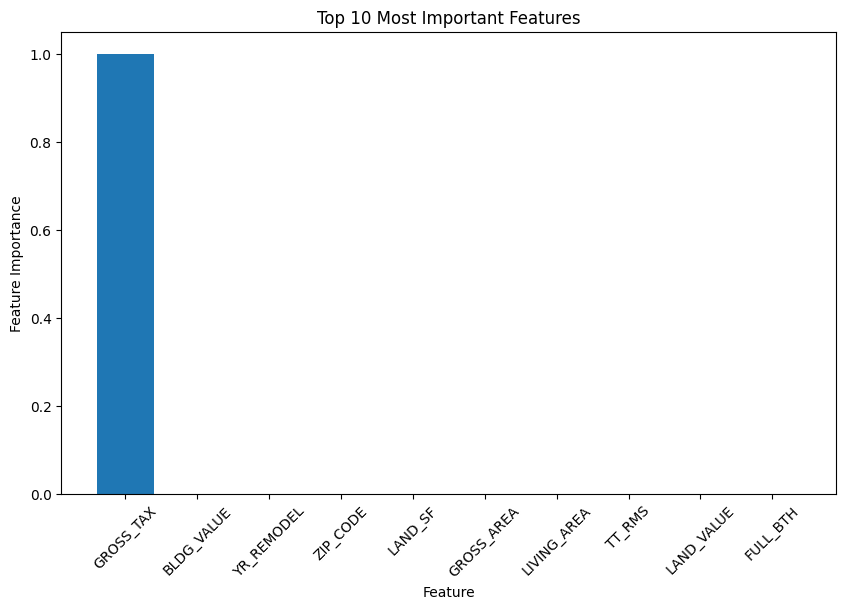

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
feature_importances = best_model_gb.feature_importances_

# Get the list of feature names (assuming you have it available)
feature_names = list(X_train.columns)

# Sort feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]

# Plot the top 10 most important features
top_features_count = 10
plt.figure(figsize=(10, 6))
plt.title("Top 10 Most Important Features")
plt.bar(range(top_features_count), feature_importances[sorted_idx[:top_features_count]], align="center")
plt.xticks(range(top_features_count), [feature_names[i] for i in sorted_idx[:top_features_count]], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.show()


In [11]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_top_features, y, test_size=0.2, random_state=42)

# Instantiate RandomForestRegressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
xgb_regressor.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = xgb_regressor.predict(X_train)

# Calculate the mean squared error for training data
train_mse = mean_squared_error(y_train, train_predictions)
print(f"Training Mean Squared Error for XPBoost Model: {train_mse}")

# Make predictions on the test set
predictions = xgb_regressor.predict(X_test)

# Calculate the mean squared error to evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error for XPBoost Model: {mse}")

Training Mean Squared Error for XPBoost Model: 18151794.04965809
Mean Squared Error for XPBoost Model: 89755520.21668339


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameters and their possible distributions for random search
param_dist = {
    'n_estimators': randint(50, 200),  # Number of boosting rounds
    'max_depth': [3, 4, 5, 6],  # Maximum depth of the trees
    'learning_rate': [0.01, 0.05, 0.1, 0.5],  # Step size shrinking to prevent overfitting
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for fitting the trees
    'colsample_bytree': [0.8, 0.9, 1.0]  # Fraction of features used for each boosting round
}

# Instantiate XGBoost Regressor
xgb_regressor = XGBRegressor(random_state=42)

# Create Random Search model
random_search_xgb = RandomizedSearchCV(estimator=xgb_regressor, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42, verbose=2)

# Perform Random Search
random_search_xgb.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params_xgb = random_search_xgb.best_params_
best_model_xgb = random_search_xgb.best_estimator_

# Train the best model on the entire training data
best_model_xgb.fit(X_train, y_train)

# Make predictions on the test set
predictions_xgb = best_model_xgb.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, predictions_xgb)
print(f"Mean Squared Error (XGBoost): {mse_xgb}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mean Squared Error (XGBoost): 601874.7204934374
